# Simula√ß√£o de Padr√µes de Turing e Estruturas Dissipativas ‚Äî Modelo Gray-Scott

### Amostras De Caminhos (Path Integral Monte Carlo) Oscilador Harm√¥nico 1D:

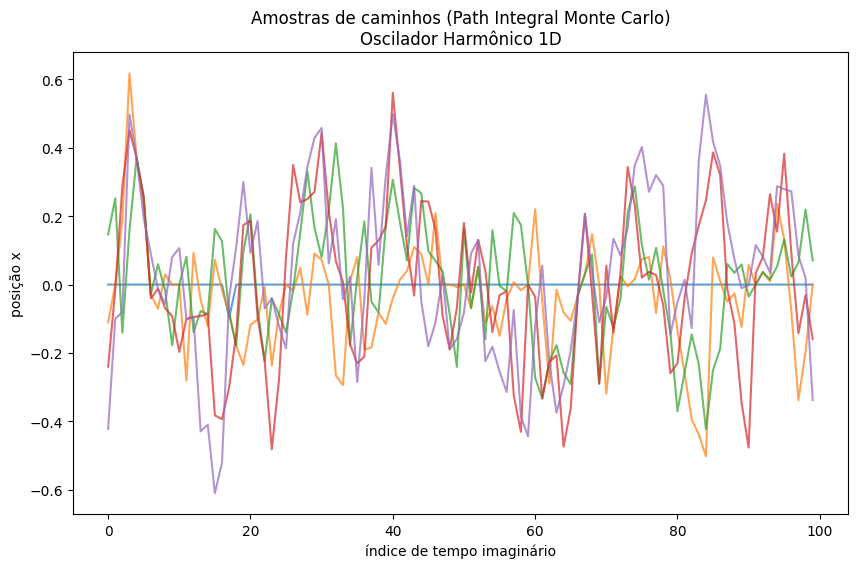

In [1]:
# Vamos criar uma primeira parte: 
# Simular um Path Integral Monte Carlo (PIMC) para um oscilador harm√¥nico 1D
# usando discretiza√ß√£o simples para ilustrar a ideia b√°sica.

import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# 1) Par√¢metros do sistema
# ------------------------
m = 1.0         # massa
omega = 1.0     # frequ√™ncia natural
beta = 4.0      # inversa da temperatura (1/kT)
N = 100         # n√∫mero de divis√µes no tempo imagin√°rio
dtau = beta / N # passo no tempo imagin√°rio

n_steps = 5000  # n√∫mero de passos Monte Carlo

# ------------------------
# 2) Inicializa√ß√£o
# ------------------------
path = np.zeros(N)  # caminho inicial: tudo zero
paths = []          # para guardar amostras para plot

# ------------------------
# 3) Fun√ß√£o de a√ß√£o euclidiana
# ------------------------
def S(path):
    """Calcula a√ß√£o euclidiana discretizada"""
    kin = 0.0
    pot = 0.0
    for i in range(N):
        ip1 = (i + 1) % N
        kin += 0.5 * m * (path[ip1] - path[i])**2 / dtau
        pot += 0.5 * m * omega**2 * path[i]**2 * dtau
    return kin + pot

# ------------------------
# 4) Algoritmo Metropolis
# ------------------------
for step in range(n_steps):
    # escolhe √≠ndice aleat√≥rio
    i = np.random.randint(N)
    old_x = path[i]
    new_x = old_x + np.random.uniform(-1, 1)  # pequena perturba√ß√£o

    # calcula delta a√ß√£o
    old_S = S(path)
    path[i] = new_x
    new_S = S(path)

    dS = new_S - old_S

    # crit√©rio Metropolis
    if np.random.rand() > np.exp(-dS):
        # rejeita
        path[i] = old_x

    if step % 50 == 0:
        paths.append(path.copy())

# ------------------------
# 5) Visualiza√ß√£o
# ------------------------
# Pegar algumas amostras
paths = np.array(paths)

plt.figure(figsize=(10, 6))
for i in range(0, len(paths), int(len(paths)/5)):
    plt.plot(paths[i], alpha=0.7)

plt.title("Amostras de caminhos (Path Integral Monte Carlo)\nOscilador Harm√¥nico 1D")
plt.xlabel("√≠ndice de tempo imagin√°rio")
plt.ylabel("posi√ß√£o x")
plt.show()

### c√°lculo de propriedades m√©dias (‚ü®x¬≤‚ü©, energia, etc.) usando essas amostras:

In [2]:
# ----------------------------------------
# 1) Calcular propriedades m√©dias usando as amostras
# ----------------------------------------

# Vamos calcular:
# - ‚ü®x^2‚ü©: flutua√ß√£o m√©dia de posi√ß√£o
# - Energia potencial m√©dia: (1/2) m œâ¬≤ ‚ü®x¬≤‚ü©
# - Energia cin√©tica m√©dia: derivada via Teorema do Virial para o oscilador harm√¥nico

# Extrai todos os pontos de todas as amostras
all_positions = paths.flatten()

# ‚ü®x¬≤‚ü©
x2_mean = np.mean(all_positions ** 2)

# Energia potencial m√©dia
V_mean = 0.5 * m * omega**2 * x2_mean

# Energia total m√©dia (usando o fato de que para o oscilador harm√¥nico, E_kin = E_pot)
E_mean = 2 * V_mean

# Energia te√≥rica exata
E_exact = 0.5 * omega / np.tanh(0.5 * beta * omega)

# ----------------------------------------
# 2) Mostrar resultados
# ----------------------------------------
print(f"<x^2> = {x2_mean:.4f}")
print(f"‚ü®V‚ü© = {V_mean:.4f}")
print(f"‚ü®E‚ü© (num√©rico) = {E_mean:.4f}")
print(f"‚ü®E‚ü© (exato)    = {E_exact:.4f}")


<x^2> = 0.0468
‚ü®V‚ü© = 0.0234
‚ü®E‚ü© (num√©rico) = 0.0468
‚ü®E‚ü© (exato)    = 0.5187


### exemplo num√©rico dos coeficientes de Onsager

* Um sistema bidimensional com dois fluxos acoplados (ex: calor e massa).
* Resolver numericamente os coeficientes: ùêø(ùëñùëó) = ùêø(ùëóùëñ)
* Mostrar a simetria de Onsager na pr√°tica.
* O sistema simulado tem dois fluxos acoplados (ex: fluxo de calor e difus√£o de massa).
* Os fluxos dependem linearmente das for√ßas externas (gradientes).

Matriz L verdadeira:
[[2. 1.]
 [1. 3.]]

Matriz L estimada:
[[1.96835901 1.04701696]
 [0.97054298 3.02861942]]

Simetria Onsager (diferen√ßa L12 vs L21):
L12 - L21 = 0.0765


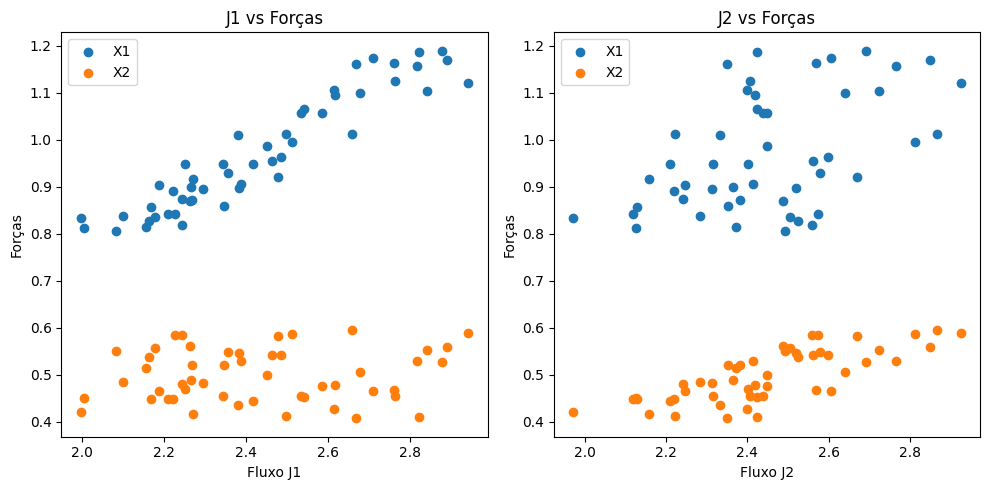

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------
# 1) Modelo simples de Onsager
# ----------------------------------------
# Suponha um sistema com:
# J1 = L11 * X1 + L12 * X2
# J2 = L21 * X1 + L22 * X2
# Queremos estimar os Lij numericamente

# For√ßas termodin√¢micas impostas
X1 = 1.0  # gradiente de temperatura
X2 = 0.5  # gradiente de concentra√ß√£o

# Coeficientes verdadeiros (hipot√©ticos)
L11_true = 2.0
L12_true = 1.0
L21_true = 1.0
L22_true = 3.0

# Fluxos gerados
J1 = L11_true * X1 + L12_true * X2
J2 = L21_true * X1 + L22_true * X2

# ----------------------------------------
# 2) Medi√ß√µes experimentais simuladas
# ----------------------------------------
# Simular algumas medi√ß√µes variando X1 e X2
n_measurements = 50
X1_vals = np.random.uniform(0.8, 1.2, n_measurements)
X2_vals = np.random.uniform(0.4, 0.6, n_measurements)

J1_vals = L11_true * X1_vals + L12_true * X2_vals + np.random.normal(0, 0.05, n_measurements)
J2_vals = L21_true * X1_vals + L22_true * X2_vals + np.random.normal(0, 0.05, n_measurements)

# ----------------------------------------
# 3) Estimar Lij por m√≠nimos quadrados
# ----------------------------------------
# Matriz de design
X = np.vstack([X1_vals, X2_vals]).T

# Resolu√ß√£o: J = X @ L
L1_est, _, _, _ = np.linalg.lstsq(X, J1_vals, rcond=None)
L2_est, _, _, _ = np.linalg.lstsq(X, J2_vals, rcond=None)

# Matriz estimada
L_est = np.vstack([L1_est, L2_est])

# ----------------------------------------
# 4) Mostrar resultados
# ----------------------------------------
print("Matriz L verdadeira:")
print(np.array([[L11_true, L12_true], [L21_true, L22_true]]))

print("\nMatriz L estimada:")
print(L_est)

print("\nSimetria Onsager (diferen√ßa L12 vs L21):")
print(f"L12 - L21 = {L_est[0,1] - L_est[1,0]:.4f}")

# ----------------------------------------
# 5) Visualiza√ß√£o
# ----------------------------------------
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(J1_vals, X1_vals, label="X1")
plt.scatter(J1_vals, X2_vals, label="X2")
plt.title("J1 vs For√ßas")
plt.xlabel("Fluxo J1")
plt.ylabel("For√ßas")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(J2_vals, X1_vals, label="X1")
plt.scatter(J2_vals, X2_vals, label="X2")
plt.title("J2 vs For√ßas")
plt.xlabel("Fluxo J2")
plt.ylabel("For√ßas")
plt.legend()

plt.tight_layout()
plt.show()


# Prigogine: Simula√ß√£o de estrutura dissipativa (ex: rolos de B√©nard ou rea√ß√£o de Belousov-Zhabotinsky):

* Difus√£o (espalhamento de subst√¢ncias qu√≠micas)
* Rea√ß√£o n√£o linear (produ√ß√£o e remo√ß√£o de reagentes)
* Isso exemplifica o princ√≠pio de Prigogine: ordem local surge em sistemas abertos longe do equil√≠brio, mantida pelo fluxo cont√≠nuo de energia e mat√©ria.
* Difus√£o: faz U e V se espalharem.
* Rea√ß√£o qu√≠mica n√£o-linear: U e V se transformam entre si e competem.
* Fonte e sumidouro (F e k): mant√™m o sistema longe do equil√≠brio.
* Esse conflito entre espalhar e reagir quebra a simetria homog√™nea ‚Üí surge uma estrutura espacial regular, chamada padr√£o de Turing.

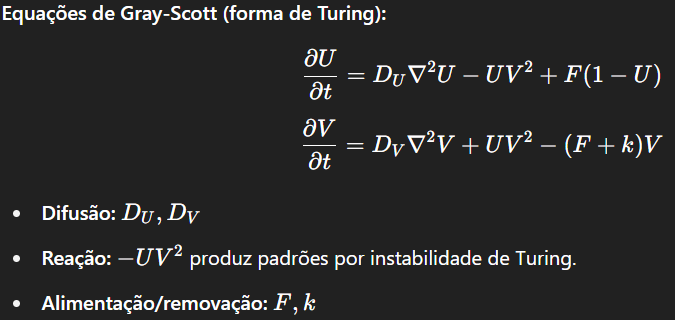

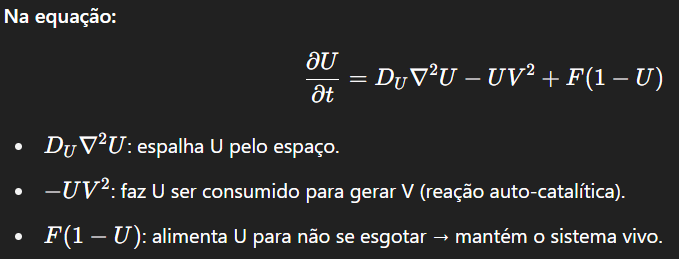

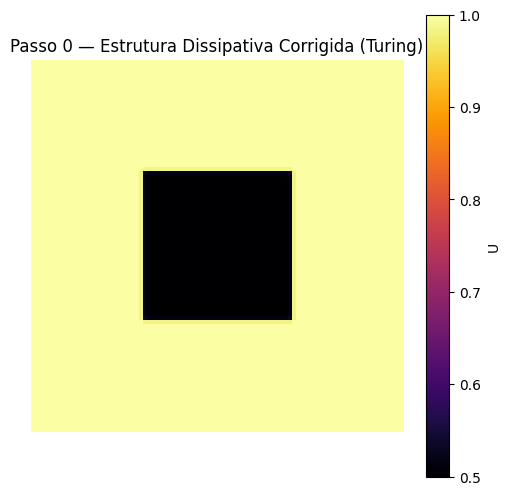

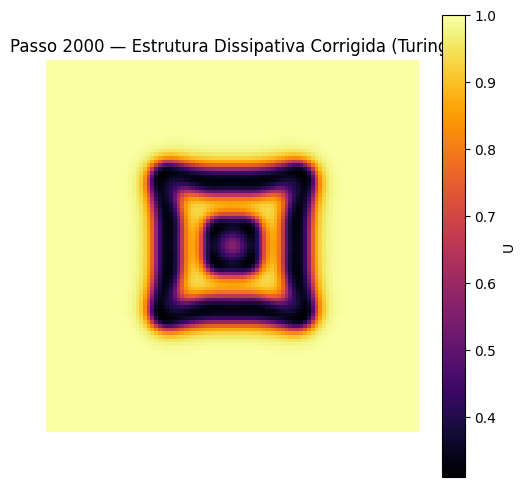

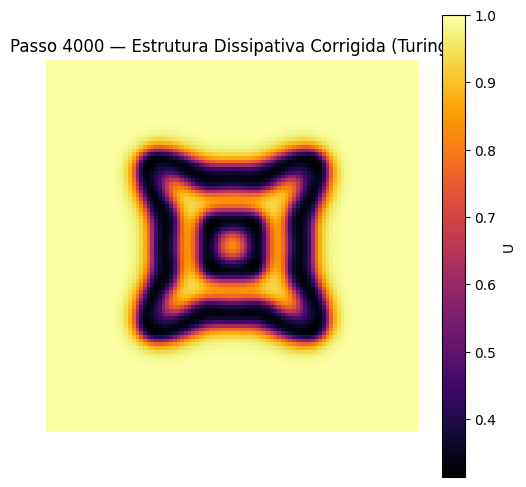

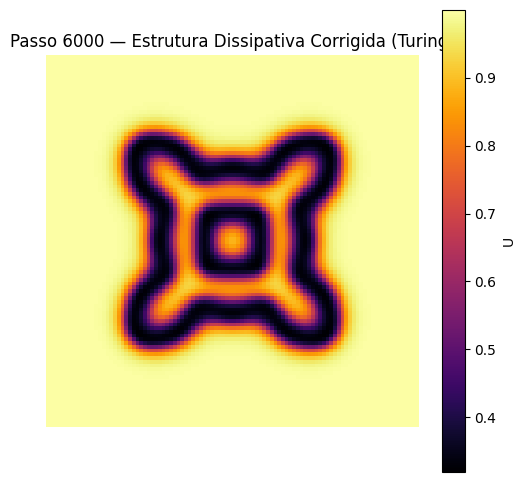

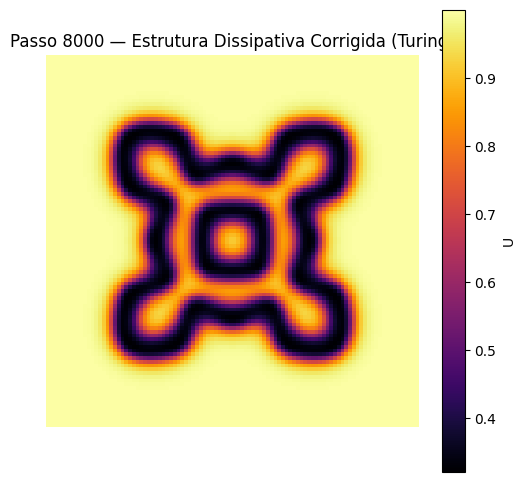

In [ ]:
# ‚úÖ Vamos corrigir e explicar claramente.
# Problemas comuns:
# 1) Laplaciano mal escalonado (dx muito grande).
# 2) Passo dt muito grande para estabilidade.
# 3) Sem imposi√ß√£o de limites (n√£o-negatividade).

import numpy as np
import matplotlib.pyplot as plt

# Par√¢metros do modelo Gray-Scott (Turing)
Du, Dv = 0.16, 0.08  # difus√£o
F, k = 0.060, 0.062  # alimenta√ß√£o e remo√ß√£o

# Dimens√£o da malha
N = 100
dx = 1.0  # usando dx=1.0 ajuda a estabilidade

# Passo de tempo reduzido para estabilidade de rea√ß√£o-difus√£o expl√≠cita
dt = 0.2

# Inicializa U e V
U = np.ones((N, N))
V = np.zeros((N, N))

# Semente no centro
r = 20
U[N//2 - r:N//2 + r, N//2 - r:N//2 + r] = 0.50
V[N//2 - r:N//2 + r, N//2 - r:N//2 + r] = 0.25

# Operador laplaciano com dx=1.0
def laplacian(Z):
    return (-4 * Z + np.roll(Z, 1, axis=0) + np.roll(Z, -1, axis=0) +
            np.roll(Z, 1, axis=1) + np.roll(Z, -1, axis=1))

# Simula√ß√£o
n_steps = 10000
plot_every = 2000

for n in range(n_steps):
    Lu = laplacian(U)
    Lv = laplacian(V)

    uvv = U * V * V

    U += (Du * Lu - uvv + F * (1 - U)) * dt
    V += (Dv * Lv + uvv - (F + k) * V) * dt

    # Garante n√£o-negatividade para estabilidade
    U = np.clip(U, 0, 1.0)
    V = np.clip(V, 0, 1.0)

    if n % plot_every == 0:
        plt.figure(figsize=(6, 6))
        plt.imshow(U, cmap='inferno')
        plt.title(f'Passo {n} ‚Äî Estrutura Dissipativa Corrigida (Turing)')
        plt.colorbar(label='U')
        plt.axis('off')
        plt.show()